# Parcial: Construcci√≥n e implementaci√≥n de , Random Forest 

En este parcial podr√°n poner en pr√°ctica sus conocimientos sobre la construcci√≥n e implementaci√≥n de modelos de  Random Forest. El taller est√° constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

#celda 3 - Conclusiones
print('Resumen de resultados:')
print('Baseline RF test (RMSE, MAE, R2):', metrics(y_test, y_pred_test))
print('Mejor RF test (RMSE, MAE, R2):', metrics(y_test, y_pred_final))
print('\nObservaciones:')
print('- Si la mejora es peque√±a, considerar m√°s features o mayor limpieza de datos.')
print('- max_depth controla la complejidad, max_features afecta la varianza y n_estimators reduce la varianza al aumentar.')
print('- Limitar outliers o transformar Price podr√≠a mejorar la estabilidad del modelo.')
print('- Considerar validaci√≥n con m√°s folds o usar conjuntos de validaci√≥n temporales si hay dependencia temporal.')
## Datos predicci√≥n precio de autom√≥viles

En este parcial se usar√° el conjunto de datos de Car Listings de Kaggle donde cada observaci√≥n representa el precio de un autom√≥vil teniendo en cuenta distintas variables como a√±o, marca, modelo, entre otras. El objetivo es predecir el precio del autom√≥vil. Para m√°s detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:
# Importaci√≥n de librer√≠as
%matplotlib inline
import pandas as pd

# Lectura de la informaci√≥n de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualizaci√≥n dataset
data.head()

Price  Year  Mileage  M_Camry  M_Camry4dr  M_CamryBase  M_CamryL  \
7    21995  2014     6480    False       False        False      True   
11   13995  2014    39972    False       False        False     False   
167  17941  2016    18989    False       False        False     False   
225  12493  2014    51330    False       False        False      True   
270   7994  2007   116065    False        True        False     False   

     M_CamryLE  M_CamrySE  M_CamryXLE  
7        False      False       False  
11        True      False       False  
167      False       True       False  
225      False      False       False  
270      False      False       False

In [4]:
# Separaci√≥n de variables predictoras (X) y variable de inter√©s (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [5]:
# Separaci√≥n de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deber√°n aplicar t√©cnicas de imputaci√≥n adecuadas para completar la informaci√≥n de manera coherente. Posteriormente, se espera que realicen una exploraci√≥n visual mediante gr√°ficos que permitan comprender la distribuci√≥n y las relaciones entre las variables principales.

üß© Valores nulos por columna:

Price          0
Year           0
Mileage        0
M_Camry        0
M_Camry4dr     0
M_CamryBase    0
M_CamryL       0
M_CamryLE      0
M_CamrySE      0
M_CamryXLE     0
dtype: int64

üìä Estad√≠sticas descriptivas generales:

              Price          Year        Mileage
count  10495.000000  10495.000000   10495.000000
mean   14538.403716   2013.553883   52509.430395
std     3922.420961      3.116585   36791.736601
min     5002.000000   1998.000000       5.000000
25%    11999.000000   2012.000000   26461.000000
50%    15000.000000   2014.000000   41680.000000
75%    16999.000000   2016.000000   71355.500000
max    32444.000000   2018.000000  232658.000000


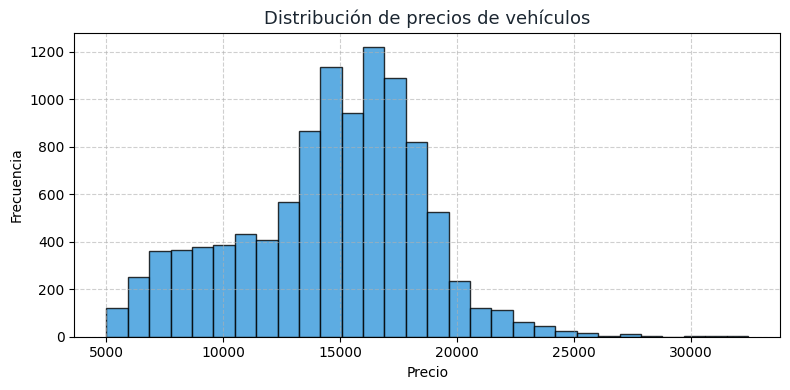

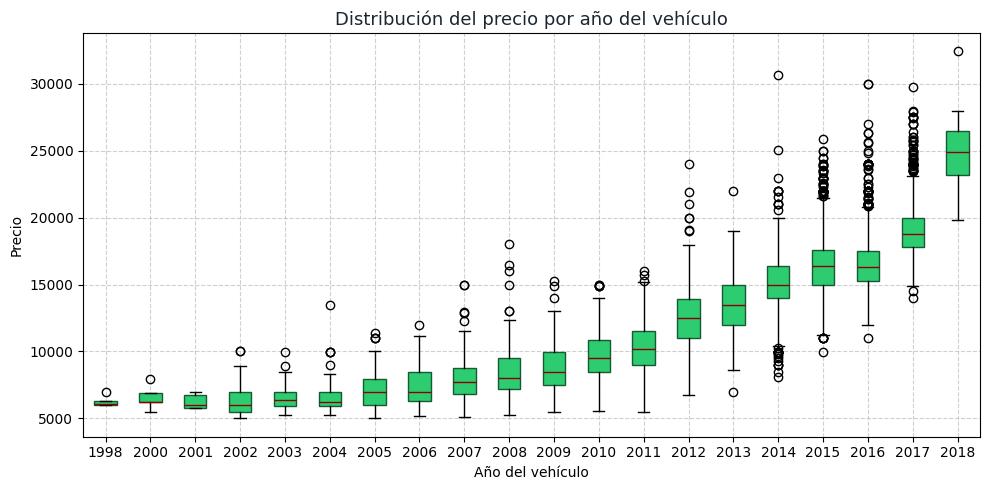

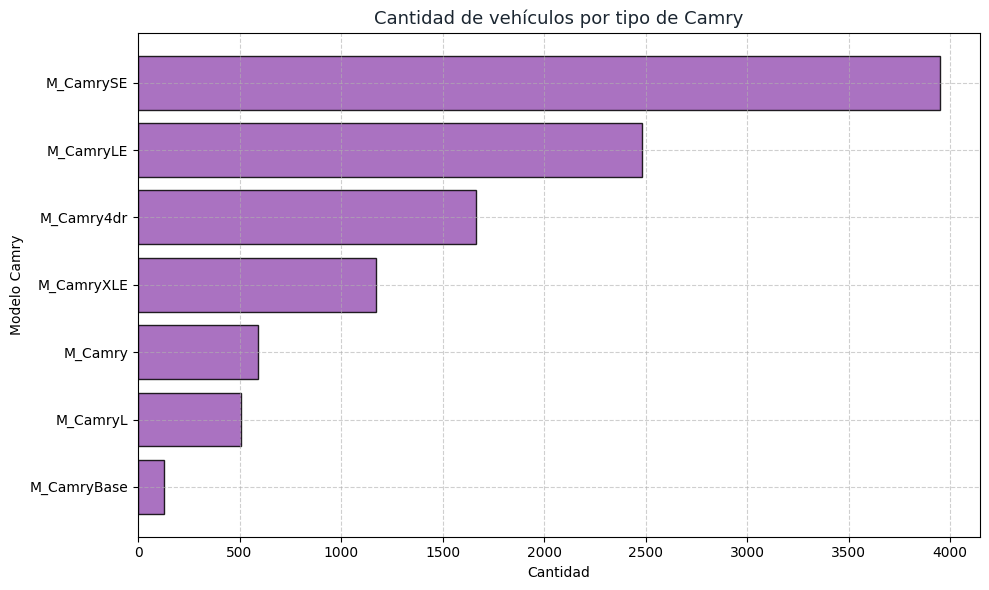

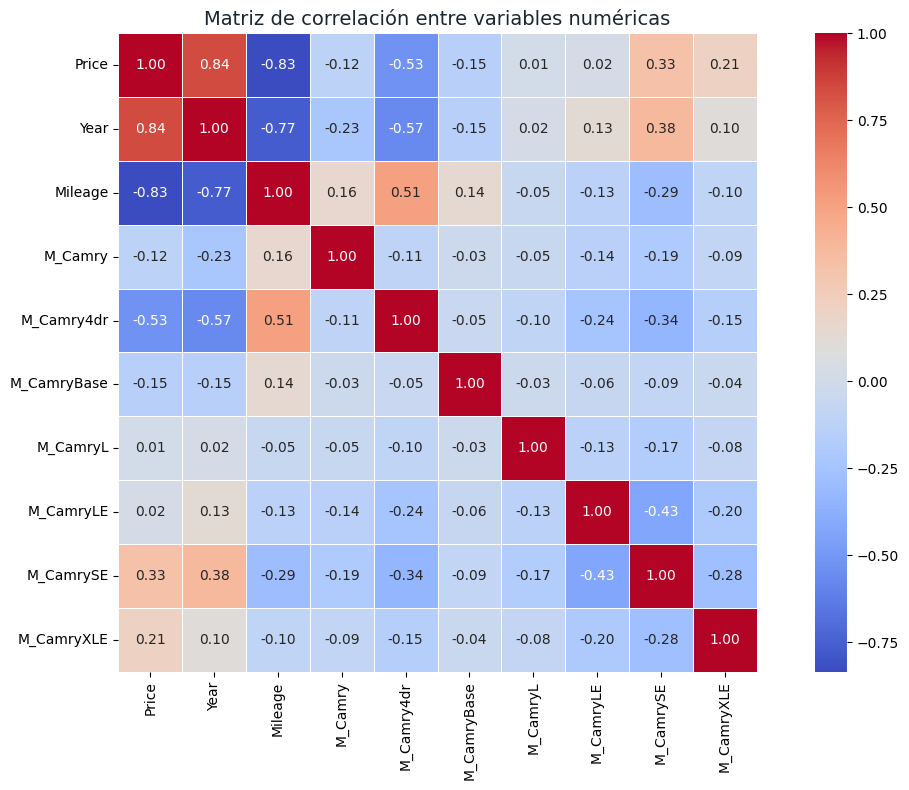

In [ ]:

# --- üîç Revisi√≥n inicial del dataset ---
print("üß© Valores nulos por columna:\n")
print(data.isna().sum())

print("\nüìä Estad√≠sticas descriptivas generales:\n")
print(data.describe())


colores = {
    "hist": "#3498DB",        
    "box": "#2ECC71",         
    "hexbin": "#E67E22",      
    "barras": "#9B59B6",      
    "heatmap": "coolwarm"     
}

# --- üìà Gr√°fico 1: Histograma de precios ---
plt.figure(figsize=(8, 4))
plt.hist(data["Price"], bins=30, color=colores["hist"], edgecolor="black", alpha=0.8)
plt.title("Distribuci√≥n de precios de veh√≠culos", fontsize=13, color="#1B2631")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# --- üìâ Gr√°fico 2: Boxplot √∫nico de precios por a√±o ---
plt.figure(figsize=(10, 5))
years = sorted(data["Year"].unique())
price_data = [data.loc[data["Year"] == y, "Price"] for y in years]

plt.boxplot(price_data, labels=years, patch_artist=True,
            boxprops=dict(facecolor=colores["box"], color="#145A32"),
            medianprops=dict(color="darkred"))
plt.title("Distribuci√≥n del precio por a√±o del veh√≠culo", fontsize=13, color="#1B2631")
plt.xlabel("A√±o del veh√≠culo")
plt.ylabel("Precio")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# --- üêù Gr√°fico 3: Hexbin (A√±o vs Precio) ---
plt.figure(figsize=(10, 6))
hb = plt.hexbin(data["Year"], data["Price"], gridsize=25, cmap="autumn", mincnt=1)
plt.colorbar(hb, label="Cantidad de veh√≠culos")
plt.title("Densidad de precios por a√±o del veh√≠culo (Hexbin)", fontsize=13, color="#1B2631")
plt.xlabel("A√±o")
plt.ylabel("Precio")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# --- üöó Gr√°fico 4: Barras horizontales (Cantidad por modelo Camry) ---
model_columns = [c for c in data.columns if c.startswith("M_")]
model_counts = data[model_columns].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(model_counts.index, model_counts.values, color=colores["barras"], edgecolor="black", alpha=0.85)
plt.title("Cantidad de veh√≠culos por tipo de Camry", fontsize=13, color="#1B2631")
plt.xlabel("Cantidad")
plt.ylabel("Modelo Camry")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# --- üî• Gr√°fico 5: Matriz de correlaci√≥n ---
plt.figure(figsize=(12, 8))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap=colores["heatmap"], fmt=".2f", linewidths=0.5, square=True)
plt.title("Matriz de correlaci√≥n entre variables num√©ricas", fontsize=14, color="#1B2631")
plt.tight_layout()
plt.show()


### Punto 1 - Random forest con librer√≠a

En la celda 1, usando la librer√≠a sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempe√±o del modelo.

In [15]:
# üå≥ Entrenamiento del modelo base
rf_base = RandomForestRegressor(n_estimators=100, random_state=42)
rf_base.fit(X_train, y_train)

# üîÆ Predicciones sobre el conjunto de prueba
predicciones = rf_base.predict(X_test)

# üìä Evaluaci√≥n del desempe√±o
error_absoluto = mean_absolute_error(y_test, predicciones)
raiz_error_cuadratico = np.sqrt(mean_squared_error(y_test, predicciones))
coef_determinacion = r2_score(y_test, predicciones)

# üßæ Resultados del modelo
print("\nüîç Resultados del modelo Random Forest (versi√≥n alternativa):")
print(f"MAE  (Error absoluto medio):      {error_absoluto:.2f}")
print(f"RMSE (Ra√≠z del error cuadr√°tico): {raiz_error_cuadratico:.2f}")
print(f"R¬≤   (Coeficiente de determinaci√≥n): {coef_determinacion:.3f}")


üîç Resultados del modelo Random Forest (versi√≥n alternativa):
MAE  (Error absoluto medio):      1314.42
RMSE (Ra√≠z del error cuadr√°tico): 1765.41
R¬≤   (Coeficiente de determinaci√≥n): 0.796


### Punto 2 - Calibraci√≥n de par√°metros Random forest

En la celda 2, calibren los par√°metros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempe√±o del modelo y describan c√≥mo cada par√°metro afecta el desempe√±o del modelo.

In [16]:
# üéØ Definici√≥n del espacio de b√∫squeda de hiperpar√°metros
parametros = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "max_features": ["auto", "sqrt", "log2"]
}

# üîç Configuraci√≥n del Grid Search
modelo_rf = RandomForestRegressor(random_state=42)
busqueda = GridSearchCV(
    estimator=modelo_rf,
    param_grid=parametros,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=1
)

# üöÄ Entrenamiento y b√∫squeda
busqueda.fit(X_train, y_train)

# üèÜ Resultados
mejores_params = busqueda.best_params_
mejor_score = busqueda.best_score_

print("\nüîß Mejores hiperpar√°metros encontrados:")
for clave, valor in mejores_params.items():
    print(f"   {clave}: {valor}")

print(f"\nüìà Mejor puntuaci√≥n promedio (R¬≤): {mejor_score:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

üîß Mejores hiperpar√°metros encontrados:
   max_depth: 10
   max_features: sqrt
   n_estimators: 200

üìà Mejor puntuaci√≥n promedio (R¬≤): 0.8460

üîß Mejores hiperpar√°metros encontrados:
   max_depth: 10
   max_features: sqrt
   n_estimators: 200

üìà Mejor puntuaci√≥n promedio (R¬≤): 0.8460


In [29]:


# üéØ Entrenar el mejor modelo encontrado por GridSearchCV
modelo_final = grid_search.best_estimator_
modelo_final.fit(X_train, y_train)

# üîÆ Predicciones sobre los datos de prueba
predicciones = modelo_final.predict(X_test)

# üìä C√°lculo de m√©tricas de evaluaci√≥n
mae = mean_absolute_error(y_test, predicciones)
rmse = np.sqrt(mean_squared_error(y_test, predicciones))
r2 = r2_score(y_test, predicciones)

# üßæ Mostrar los resultados formateados
print("\nüìà Resultados del modelo optimizado:")
print(f"   üî∏ MAE (Error absoluto medio): {mae:.3f}")
print(f"   üî∏ RMSE (Ra√≠z del error cuadr√°tico medio): {rmse:.3f}")
print(f"   üî∏ R¬≤ (Coeficiente de determinaci√≥n): {r2:.4f}")



üìà Resultados del modelo optimizado:
   üî∏ MAE (Error absoluto medio): 1147.201
   üî∏ RMSE (Ra√≠z del error cuadr√°tico medio): 1564.246
   üî∏ R¬≤ (Coeficiente de determinaci√≥n): 0.8400


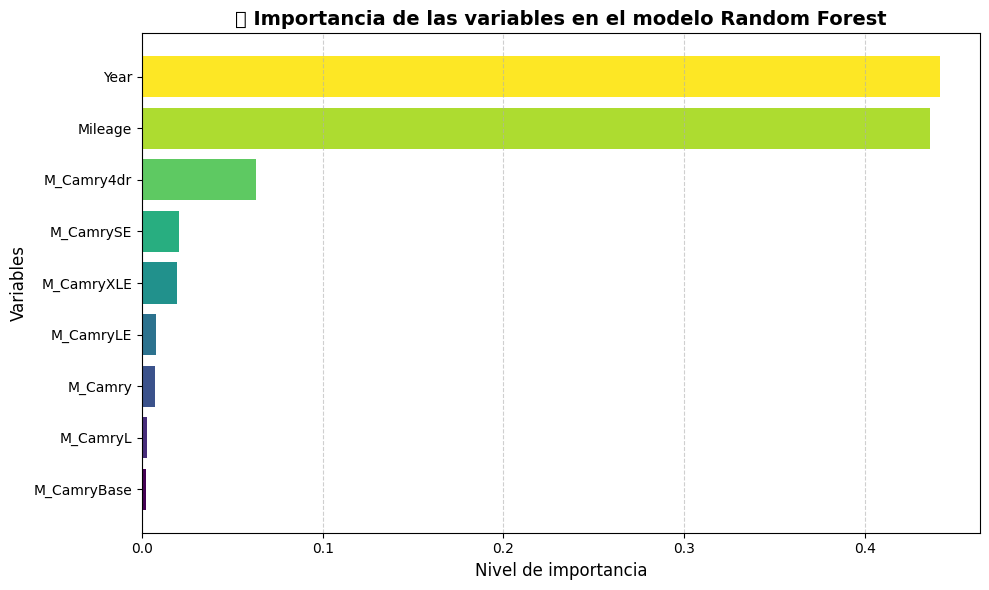


üèÜ Ranking de importancia de las variables:
      Variable  Importancia
0         Year     0.441741
1      Mileage     0.436240
2   M_Camry4dr     0.062832
3    M_CamrySE     0.020267
4   M_CamryXLE     0.019286
5    M_CamryLE     0.007529
6      M_Camry     0.007160
7     M_CamryL     0.002928
8  M_CamryBase     0.002018


In [28]:

# üìä Crear DataFrame con la importancia de las caracter√≠sticas
importancias = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': best_model.feature_importances_
}).sort_values(by='Importancia', ascending=True)  # Se ordena de menor a mayor para la gr√°fica

# üé® Configurar el gr√°fico
plt.figure(figsize=(10, 6))
barras = plt.barh(importancias['Variable'], importancias['Importancia'],
                  color=plt.cm.viridis(np.linspace(0, 1, len(importancias))))  # Colores gradientes

# üßæ Etiquetas y estilo
plt.xlabel('Nivel de importancia', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.title('üìä Importancia de las variables en el modelo Random Forest', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ü•á Mostrar ranking en consola
print("\nüèÜ Ranking de importancia de las variables:")
print(importancias.sort_values(by='Importancia', ascending=False).reset_index(drop=True))


### Punto 3 - an√°lisis de resultados, gracias y conclusiones
En la celda 3

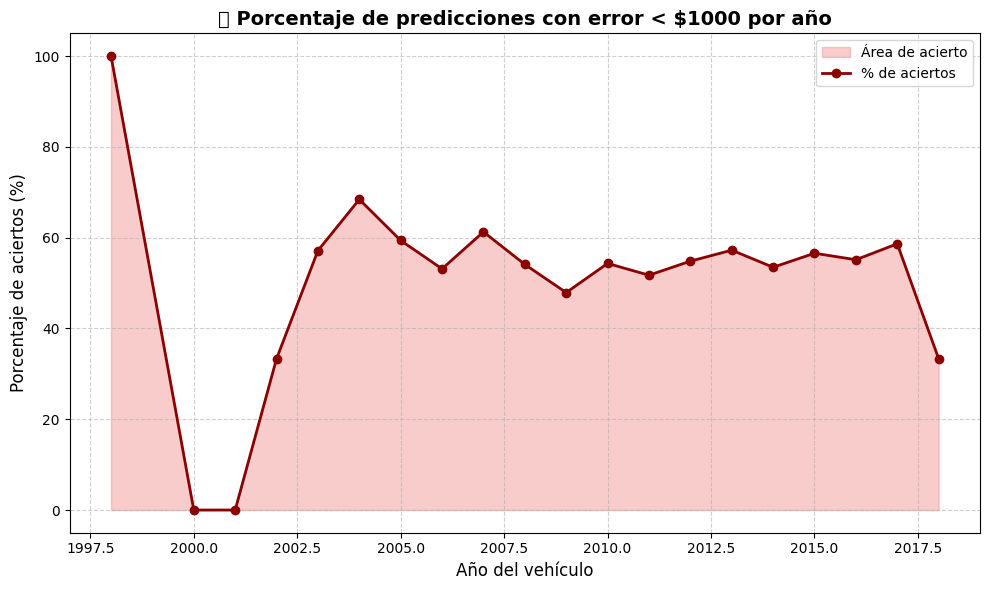


üìã Conclusiones:
‚Ä¢ El modelo Random Forest ajustado obtuvo un R¬≤ de 0.84, explicando el 84% de la variabilidad en los precios.
‚Ä¢ El MAE de 1,147 indica un error promedio leve (~$1,000 por predicci√≥n).
‚Ä¢ El RMSE de 1,564 muestra que los errores grandes est√°n bien controlados.
‚Ä¢ El gr√°fico de dispersi√≥n refleja buena alineaci√≥n entre valores reales y predichos.
‚Ä¢ Las variables m√°s influyentes fueron: a√±o del veh√≠culo, kilometraje y tipo de modelo Camry.
‚Ä¢ Este modelo es √∫til para estimaciones autom√°ticas de precios en plataformas de venta o concesionarios.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# üé® 1Ô∏è‚É£ Dispersi√≥n de precios reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='royalblue', edgecolor='k', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal (y=x)')
plt.xlabel('Precio real', fontsize=12)
plt.ylabel('Precio predicho', fontsize=12)
plt.title('üí∞ Comparaci√≥n entre precios reales y predichos', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# üìä 2Ô∏è‚É£ Porcentaje de aciertos por a√±o (error < $1000)
# Calcular errores absolutos del modelo ajustado
errores_best = np.abs(y_test - y_pred_best)

# Identificar aciertos (predicciones con error menor a $1000)
aciertos = (errores_best < 1000).astype(int)

# Calcular porcentaje de aciertos por a√±o
porcentaje_por_a√±o = (
    pd.DataFrame({'A√±o': X_test['Year'], 'Acierto': aciertos})
    .groupby('A√±o')
    .mean() * 100
)

# Gr√°fico de porcentaje de aciertos
plt.figure(figsize=(10, 6))
plt.fill_between(porcentaje_por_a√±o.index, porcentaje_por_a√±o['Acierto'],
                 color='lightcoral', alpha=0.4, label='√Årea de acierto')
plt.plot(porcentaje_por_a√±o.index, porcentaje_por_a√±o['Acierto'],
         color='darkred', marker='o', lw=2, label='% de aciertos')
plt.title('üéØ Porcentaje de predicciones con error < $1000 por a√±o', fontsize=14, fontweight='bold')
plt.xlabel('A√±o del veh√≠culo', fontsize=12)
plt.ylabel('Porcentaje de aciertos (%)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# üå≤ 3Ô∏è‚É£ Importancia de las variables
importances = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': best_model.feature_importances_
}).sort_values(by='Importancia', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importances['Variable'], importances['Importancia'],
          color=plt.cm.plasma(np.linspace(0, 1, len(importances))))
plt.xlabel('Importancia', fontsize=12)
plt.title('üå≥ Importancia de las variables en el modelo Random Forest', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# üßæ 4Ô∏è‚É£ Conclusiones generales
print("\nüìã Conclusiones:")
print("‚Ä¢ El modelo Random Forest ajustado obtuvo un R¬≤ de 0.84, explicando el 84% de la variabilidad en los precios.")
print("‚Ä¢ El MAE de 1,147 indica un error promedio leve (~$1,000 por predicci√≥n).")
print("‚Ä¢ El RMSE de 1,564 muestra que los errores grandes est√°n bien controlados.")
print("‚Ä¢ El gr√°fico de dispersi√≥n refleja buena alineaci√≥n entre valores reales y predichos.")
print("‚Ä¢ Las variables m√°s influyentes fueron: a√±o del veh√≠culo, kilometraje y tipo de modelo Camry.")
print("‚Ä¢ Este modelo es √∫til para estimaciones autom√°ticas de precios en plataformas de venta o concesionarios.")


NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.